In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import pickle

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15) 

C:\Users\agiedd\Anaconda2\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
file1 = open("qcd_100000_pt_1000_1200.pkl", 'rb')
data1 = pickle.load(file1)
file2 = open("higgs_100000_pt_1000_1200.pkl", 'rb')
data2 = pickle.load(file2)

In [10]:
data1.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

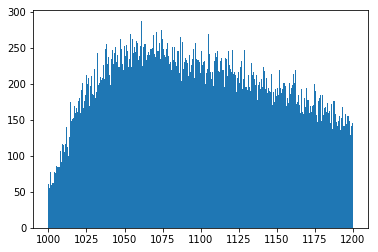

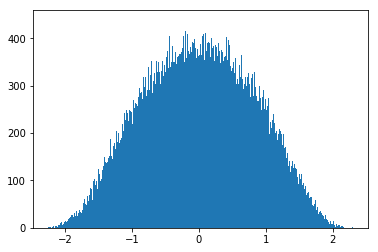

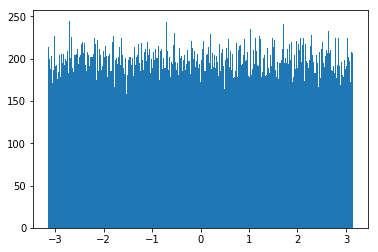

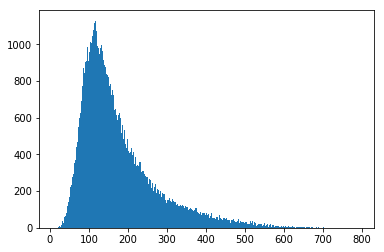

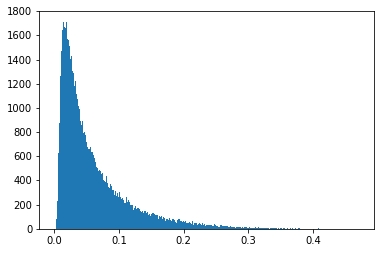

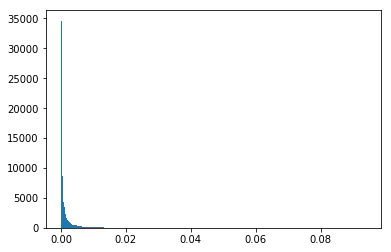

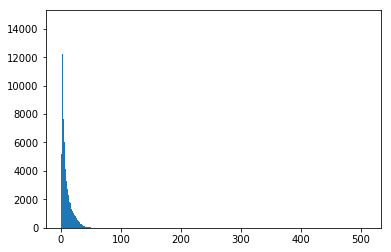

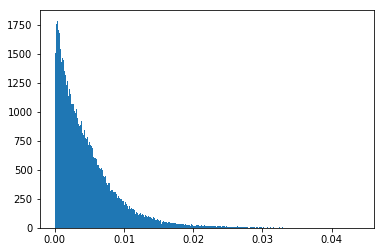

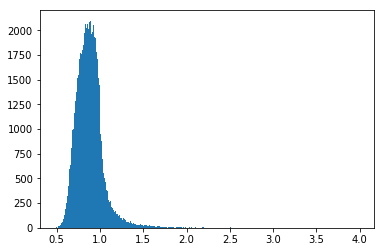

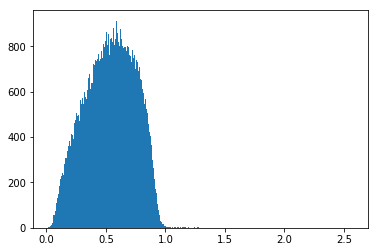

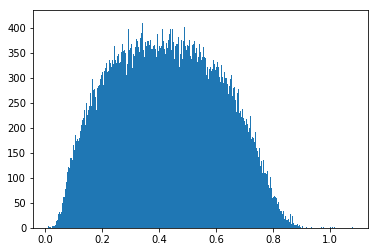

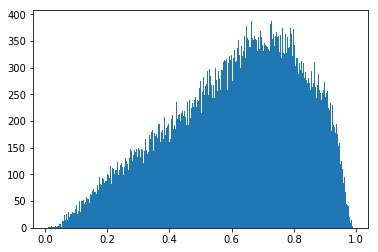

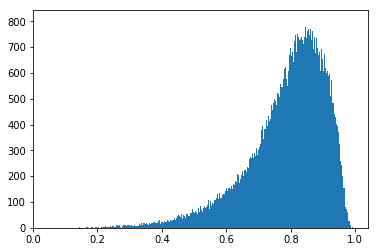

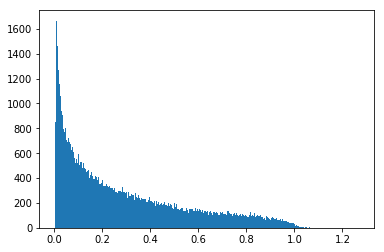

In [24]:
for key in data1.keys():
    plt.hist(data1[key], bins = 500)
    plt.show()

1) Do all features provide discrimination power between signal and background?

2) Are there correlations among these features?

3) Compute expected discovery sensitivity by normalizing each sample appropriately.

4) Develop a plan to optimize the discovery sensitivity by applying selections to these features.

In [14]:
# Pick angle and compaore poisson distribution at that angle in the signal to the poisson distribution at that angle in the 
# background